<a href="https://colab.research.google.com/github/s3965610/COSC2671-A2/blob/asif_community_detection/community_detection_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import json
from pandas import json_normalize
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import networkx as nx
import community
import random
import csv

In [2]:
# directory must be changed to local from google drive
with open("/content/drive/MyDrive/data/user_info.json", "r") as read_file:
    user_infos = json.load(read_file)


In [3]:
language_dict = {}
for i in user_infos:
    language_dict[i] = []
    nodes = []
    if( user_infos[i]['data']!= None):
        nodes = user_infos[i]['data']['user']['repositories']['nodes']
        
    for n in nodes:
        if(n['primaryLanguage'] != None):
            
            language_dict[i].append(n['primaryLanguage']['name'])
        
 
        # language_dict[i].append(n['primaryLanguage']['name'])


In [4]:
languages = []
for key, val in language_dict.items():
    language_dict[key] = set(val)
    languages.extend(val)

In [5]:
languages = set(languages)

## Create graph
Graph is created by building an edge if two users have common languages used in their repositories. The wieght of the edge is the number of common programming languages used

In [9]:
G = nx.Graph()

# TODO: Remember to import matplotlib.pyplot
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import random
# TODO: for you to complete!
# use networkx to draw

users = random.sample(list(language_dict.keys()), 200)
print(users)
count = 0
for i in range(len(users) - 1):
    user = users[i]
    for j in range(i + 1, len(users)):
        user2 = users[j]
        common_languages = language_dict[user].intersection(language_dict[user2])
        if(len(common_languages) > 0):
            count += 1
            G.add_edge(user,  user2, weight = len(common_languages))


['son-link', 'Ragnarokkr', 'jenny2403', 'leonkyr', 'tboydar', 'thanhngocnguyenvpt', 'farfary', 'fakih', 'pretcat', 'Supershade2', 'ParaXY', 'golfapipol', 'kamoljan', 'Hygor', 'BlazingForests', 'filipi', 'AnotherCoolDude', 'rustan-id', 'bshorrosh', 'laddy', 'SSBun', 'binary3141', 'HumanG33k', 'loyning', 'Kenziebquick', 'zivzone', 'MAJIDNISAR', 'kapilt', 'chemmyone', 'cuznvinny49', 'bclingan', 'jgarcia', 'begend', 'ogonbat', 'scratcher28', 'Codinchak', 'thevipy', 'chunkaowang', 'kreely', 'KayBeSee', 'u0m3', 'onegreydot', 'rlazojr', 'christiancscott', 'haoch', 'hcsatish', 'abhinavsaurav', 'sylar', 'titati', 'nasa72', 'phanvannhien', 'DavidWells', 'lherrera', 'arden', 'disks86', 'neychev', 'imtrobin', 'forecho', 'cnsoft', 'hoadlck', 'tamsir', 'akm', 'mattpocock', 'vinothdinakar', 'vaniot-s', 'copiesofcopies', 'vantaingo', 'strangePause', 'victor-yacovlev', 'vperilla', 'robt', 'AndrewOrr', 'knightvn80', 'markconover', 'cffswb', 'orktopus', 'n2lose', 'raven02', 'romeo57', 'marcelofmatos', 'f

In [7]:
from community import community_louvain

In [10]:
partition = community_louvain.best_partition(G)
print('Modularity of best partition: ', community_louvain.modularity(partition, G))

Modularity of best partition:  0.11846991605809315


## Visualise the graph

In [35]:
comms_dict = {}
# generate comms distionary
for lComms in set(partition.values()) :
    comms_dict[lComms] = [nodes for nodes in partition.keys() if partition[nodes] == lComms]

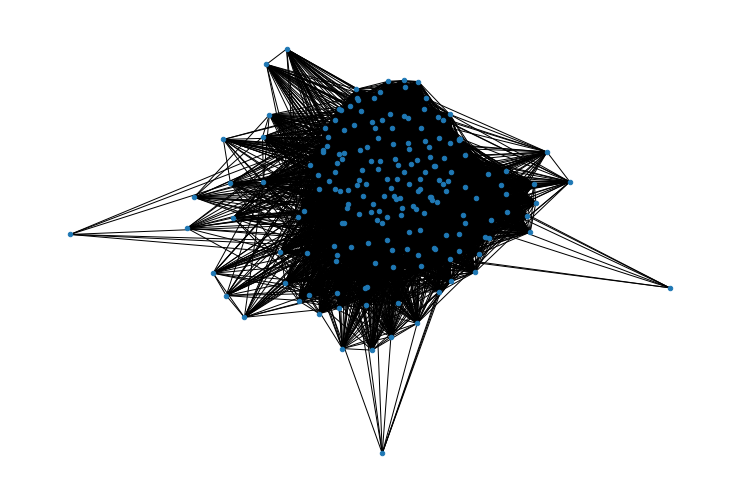

In [36]:
# code reference: https://www.kaggle.com/code/kevinvdsk/community-detection

# Draw graph
plt.figure(figsize=(13, 9))
n_partition = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for val in comms_dict.values() :
    nx.draw_networkx_nodes(G, pos, val, node_size = 20)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()



## Four communities formed

In [39]:
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 30
for lComms , nodes in comms_dict.items() :
    
    if len(nodes) < min_nb:
        G_main_com.remove_nodes_from(nodes)
    else:
        
        subgraph = G_main_com.subgraph(nodes)
        d = nx.degree_centrality(subgraph)
        comm_name = max(d, key=d.get)
        centers[comm_name] = lComms
        communities[lComms] = comm_name
        
        print('Community name ', comm_name, '(clusId ', lComms, ') - ', len(nodes), ' users:')
        print(nodes, '\n')

Community name  Sy1v4in (clusId  0 ) -  45  users:
['son-link', 'jenny2403', 'leonkyr', 'thanhngocnguyenvpt', 'farfary', 'fakih', 'kamoljan', 'BlazingForests', 'rustan-id', 'binary3141', 'HumanG33k', 'rlazojr', 'haoch', 'abhinavsaurav', 'titati', 'nasa72', 'lherrera', 'tamsir', 'copiesofcopies', 'victor-yacovlev', 'robt', 'markconover', 'BuZZ-dEE', 'ivo4j', 'irjudson', 'AUTOMATIC1111', 'andregironda', 'boardbloke', 'cmhokej', 'unforgiven512', 'ZiadAkGit', 'brkr', 'ikaygorodov', 'irina-rud', 'saipraveen-a', 'mklaehn', 'crlf0710', 'simplesoft-duongdt3', 'lulucca12', 'Tebra', 'waitinfuture', 'cuizhennan', 'Sy1v4in', 'marcosdotps', 'wyjustin'] 

Community name  hileon (clusId  1 ) -  53  users:
['Ragnarokkr', 'tboydar', 'pretcat', 'ParaXY', 'golfapipol', 'filipi', 'AnotherCoolDude', 'laddy', 'scratcher28', 'phanvannhien', 'DavidWells', 'forecho', 'mattpocock', 'vaniot-s', 'orktopus', 'n2lose', 'romeo57', 'heiyeluren', 'zhangxuekui', 'ahimsauzi', 'LeonardoZivieri', 'ivan', 'knipferrc', 'xen

## Visualise communities

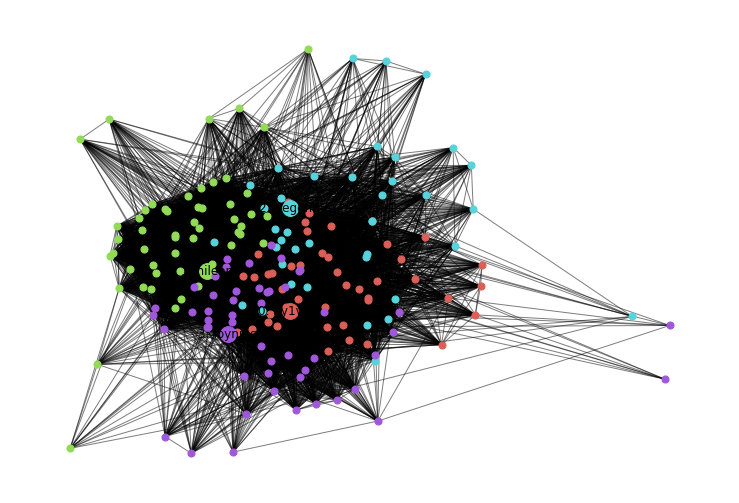

In [38]:
import seaborn as sns
# Display graph
# code reference: https://www.kaggle.com/code/kevinvdsk/community-detection
plt.figure(figsize=(13, 9))
node_size = 50
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()